# Maximum Amount of Gold

In [ ]:
%%writefile knapsack.cpp
#include <bits/stdc++.h>

using namespace std;

int optimal_weight(int W, vector<int> val, vector<int> wt, int n) {
	vector<vector<int>>  K(n + 1,vector<int>(W + 1));
	for (int i = 0; i <= n; i++) {
		for (int w = 0; w <= W; w++) {
			if (i == 0 || w == 0)
				K[i][w] = 0;
			else if (wt[i - 1] <= w)
				K[i][w] = max(val[i - 1] + K[i - 1][w - wt[i - 1]], K[i - 1][w]);
			else
				K[i][w] = K[i - 1][w];
		}
	}

	return K[n][W];
}

int main() {
	int n, Capas;
	cin >> Capas >> n;

	vector<int> Values(n);
	vector<int> Weights(n);
	int aux;
	for (size_t i = 0; i < n; i++) {
		cin >> aux;
		Values[i] = Weights[i] = aux;
	}
	cout << optimal_weight(Capas, Values, Weights, n) << "\n";
}

Writing knapsack.cpp


In [ ]:
!g++ knapsack.cpp -o knapsack
!./knapsack

10 3
1 4 8
9


#Maximum value of an arithmetic expression

In [ ]:
%%writefile parenthesis.cpp
#include <bits/stdc++.h>

using namespace std;

long long oper(long long op1, long long op2, char op) {
	if (op == '*')
		return op1 * op2;
	else if (op == '+')
		return op1 + op2;
	else if (op == '-')
		return op1 - op2;
}

long long get_maximum_value(const string &in) {

	int NumOfOperands = (in.size() + 1) / 2;

	long long Mini[NumOfOperands][NumOfOperands];
	long long Maxi[NumOfOperands][NumOfOperands];

	memset(Mini, 0, sizeof(Mini)); // initialize to 0
	memset(Maxi, 0, sizeof(Maxi)); // initialize to 0
	for (int i = 0; i < NumOfOperands; i++) {
        //stoll, String -> long long
		Mini[i][i] = stoll(in.substr(2 * i, 1));
		Maxi[i][i] = stoll(in.substr(2 * i, 1));
	}

	for (int s = 0; s < NumOfOperands - 1; s++) {
		for (int i = 0; i < NumOfOperands - s - 1; i++) {
			int j = i + s + 1;
			long long MinValue = LLONG_MAX;
			long long MaxValue = LLONG_MIN;

			for (int k = i; k < j; k++) {
				long long  a = oper(Mini[i][k], Mini[k + 1][j], in[2 * k + 1]);
				long long  b = oper(Mini[i][k], Maxi[k + 1][j], in[2 * k + 1]);
				long long c = oper(Maxi[i][k], Mini[k + 1][j], in[2 * k + 1]);
				long long d = oper(Maxi[i][k], Maxi[k + 1][j], in[2 * k + 1]);

				MinValue = min(MinValue, min(a, min(b, min(c, d))));
				MaxValue = max(MaxValue, max(a, max(b, max(c, d))));

			}
			Mini[i][j] = MinValue;
			Maxi[i][j] = MaxValue;
		}
	}

	return Maxi[0][NumOfOperands - 1];
}

int main() {
	string s;
	cin >> s;

	cout << get_maximum_value(s) << "\n";
}

Overwriting parenthesis.cpp


In [ ]:
!g++ parenthesis.cpp -o parenthesis
!./parenthesis

5-8+7*4-8+9
200


#Evidencia
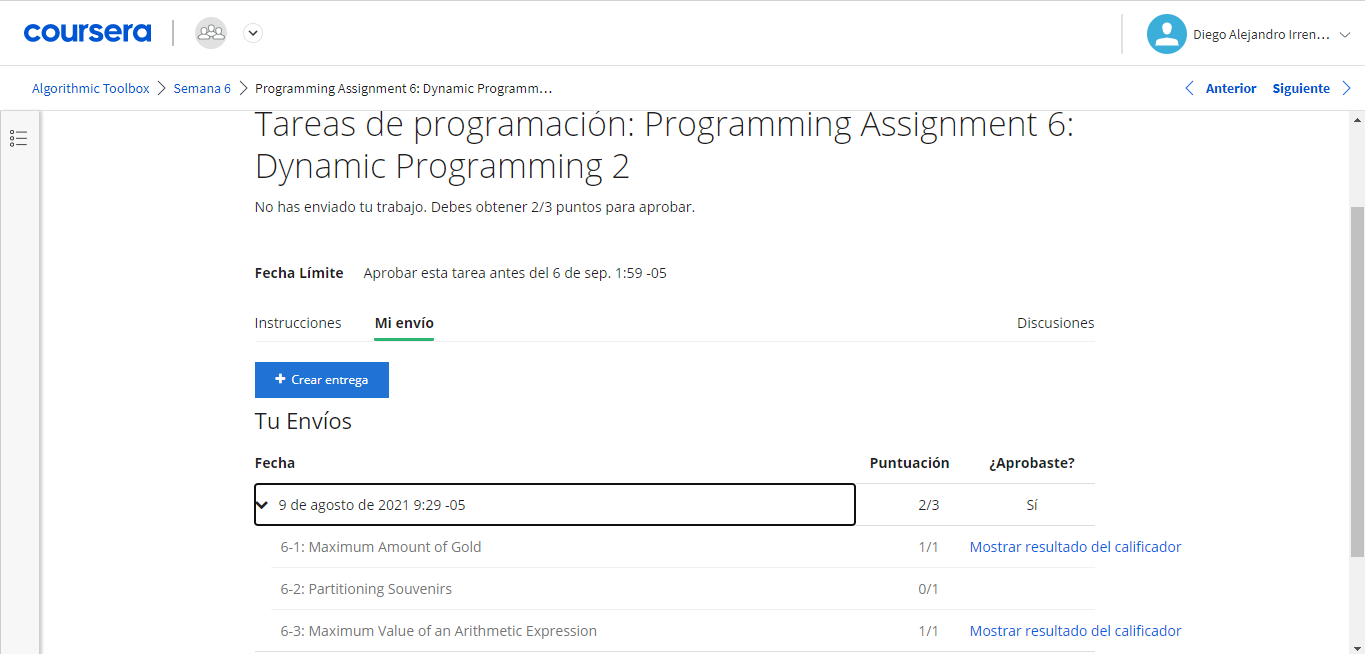